---
## **Remove Bias from the Train/Test Datasets**
---

<font size="2">Eudald Sangenis  

The objective of this file is to remove the bias of datasets (6 IMU signals (3xAcc and 3xGyro)).

Parameters To Modify:
- type_dataset: train, test 
- data_dataset:  2022_03_17 - Subject I (Chico)
                 2022_07_27 - Subject II (Eudald)
                 2022_07_27 - Subject III (Austin)

---
## **<font size="5">1. Libraries: </font>**
---

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Get the current working directory
current_directory = os.getcwd()


---
## **<font size="5">2. Parameters to modify</font>**
---

In [207]:
type_dataset = 'test'       # train, test
data_dataset = '2022_03_17'  # 2022_03_17 2022_04_25 2022_07_27 2022_08_01

In [ ]:
# Folder to read the labeled datasets:
dataset_path = current_directory+'\\datasets\\'+data_dataset+'\\'

In [ ]:
# Folder to save labeled datsets without bias:
save_dataset_path = current_directory+'\\datasets\\'+data_dataset+'\\'

---
## **<font size="5">3. Read 6 sig datasets:</font>**
---

In [210]:
print('Reading dataset '+data_dataset+' ...')
# Load the labeled 2sig dataset
df   = pd.read_csv(dataset_path + '6sig_'+type_dataset+'.csv')
print('Reading done!')

if 'Unnamed: 0' in df:     df   = df.drop(['Unnamed: 0'], axis=1)
if 'Unnamed: 0.1' in df:   df   = df.drop(['Unnamed: 0.1'], axis=1)
if 'timestamp' in df:     df   = df.drop(['timestamp'], axis=1)

print('Shapes df & df_l:')
df

Reading dataset 2022_03_17 ...
Reading done!
Shapes df & df_l:


,acc1,acc2,acc3,gyro1,gyro2,gyro3,label
0,0.054496,0.013683,-0.966700,-0.000652,0.002393,0.021989,ZUPT
1,0.055462,0.012649,-0.967454,-0.001081,0.001593,0.021492,ZUPT
2,0.055335,0.012900,-0.966855,-0.000744,0.001462,0.021069,ZUPT
3,0.055307,0.013113,-0.966312,0.000032,0.001752,0.020630,ZUPT
4,0.056035,0.014941,-0.965898,0.000640,0.002589,0.020460,ZUPT
...,...,...,...,...,...,...,...
309976,0.047317,0.050851,-0.971659,0.009881,0.002747,0.017917,ZUPT
309977,0.046905,0.050681,-0.971899,0.009774,0.003047,0.018088,ZUPT
309978,0.046916,0.051412,-0.970592,0.009553,0.003168,0.018436,ZUPT
309979,0.046765,0.053066,-0.970593,0.009953,0.002888,0.018851,ZUPT


---
## **<font size="5">4. Remove Bias:</font>**
---

<font size="2">Compute the bias of the first 800 values (1s) of the labeled datset:</font>

In [211]:
bias_window = 800 # (1s)

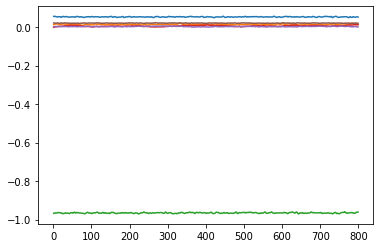

In [212]:
plt.plot(df.index[1:bias_window],  df[['acc1','acc2','acc3','gyro1','gyro2','gyro3']].iloc[1:bias_window])

In [213]:
bias_acc_1 = np.mean(df['acc1'].iloc[1:bias_window])
bias_acc_2 = np.mean(df['acc2'].iloc[1:bias_window])
bias_acc_3 = np.mean(df['acc3'].iloc[1:bias_window])
bias_gyr_1 = np.mean(df['gyro1'].iloc[1:bias_window])
bias_gyr_2 = np.mean(df['gyro2'].iloc[1:bias_window])
bias_gyr_3 = np.mean(df['gyro3'].iloc[1:bias_window])
[bias_acc_1, bias_acc_2, bias_acc_3, bias_gyr_1, bias_gyr_2, bias_gyr_3]

[0.053055264114939944,
 0.013862988067034773,
 -0.9652291677188674,
 0.005906388247408445,
 0.002896500557820401,
 0.020693501890158297]

In [214]:
df['acc1']  - bias_acc_1

0         0.001441
1         0.002407
2         0.002280
3         0.002252
4         0.002979
            ...   
309976   -0.005738
309977   -0.006151
309978   -0.006139
309979   -0.006290
309980   -0.006429
Name: acc1, Length: 309981, dtype: float64

In [215]:
df['acc1']  = df['acc1']  - bias_acc_1
df['gyro1'] = df['gyro1'] - bias_gyr_1
df['acc2']  = df['acc2']  - bias_acc_2
df['gyro2'] = df['gyro2'] - bias_gyr_2
df['acc3']  = df['acc3']  - bias_acc_3
df['gyro3'] = df['gyro3'] - bias_gyr_3

<AxesSubplot:>

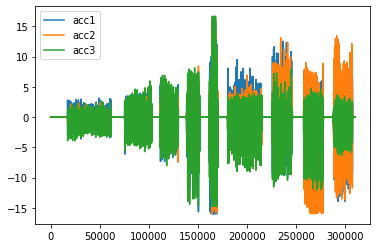

In [216]:
df.plot(y = ['acc1', 'acc2', 'acc3'], use_index = True)

In [217]:
df.head(3)

,acc1,acc2,acc3,gyro1,gyro2,gyro3,label
0,0.001441,-0.000180,-0.001471,-0.006558,-0.000504,0.001295,ZUPT
1,0.002407,-0.001214,-0.002225,-0.006987,-0.001303,0.000798,ZUPT
2,0.002280,-0.000963,-0.001625,-0.006650,-0.001435,0.000375,ZUPT


In [ ]:
# Save the dataset after removing the bias from the IMU readings
df.to_csv(save_dataset_path + '6sig_'+type_dataset+'_no_Bias.csv', index=None, mode='a')